In [1]:
# data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv('BostonHousing.csv')

def normal(x:list):
    maxi = max(x)
    mini = min(x)
    avg = np.mean(x)
    new = [(i-avg)/(maxi-mini) for i in x ]
    
    return new

df = data.copy()
df = df.apply(normal, axis=0)

Xd = df.drop(columns=['medv'])
Xd.insert(0, 'X0', 1) # bias 

# numpy array format
y = df.medv.values
y = np.expand_dims(y, axis=1)

X_b = Xd.values

# sample size
m = len(df.index)
n = X_b.shape[1]
theta = np.ones(n)

In [2]:
def normal(x:list):
    maxi = max(x)
    mini = min(x)
    avg = np.mean(x)
    new = [(i-avg)/(maxi-mini) for i in x ]
    
    return new

df = data.copy()
df = df.apply(normal, axis=0)

Xd = df.drop(columns=['medv'])
Xd.insert(0, 'X0', 1) # bias 

# numpy array format
y = df.medv.values
y = np.expand_dims(y, axis=1)

X_b = Xd.values

# sample size
m = len(df.index)
n = X_b.shape[1]
theta = np.ones(n)


print(X_b.shape)
print(y.shape)

(506, 14)
(506, 1)


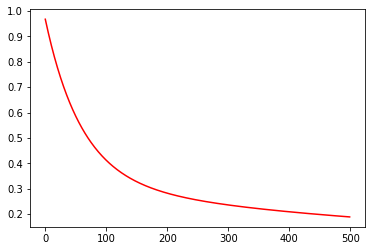

In [3]:
def batch_gradient_descent():
    n_iterations = 500
    learning_rate = 0.01
    
    # khởi tạo giá trị tham số
    thetas = np.random.randn(14, 1)
    thetas_path = [thetas]
    losses = []
    
    for i in range(n_iterations):
        # tính output
        output = X_b.dot(thetas)
        
        # tính loss
        loss = (output - y)**2        
                
        # tính đạo hàm cho loss
        loss_grd = 2*(output - y)/m
        
        # tính đạo hàm cho các tham số
        gradients = X_b.T.dot(loss_grd)
        
        # cập nhật tham số
        thetas = thetas - learning_rate*gradients
        thetas_path.append(thetas)
        
        mean_loss = np.sum(loss)/m
        losses.append(mean_loss)

    return thetas_path, losses

bgd_thetas, losses = batch_gradient_descent()

# in loss cho 100 sample đầu
x_axis = list(range(500))
plt.plot(x_axis,losses[:500], color="r")
plt.show()

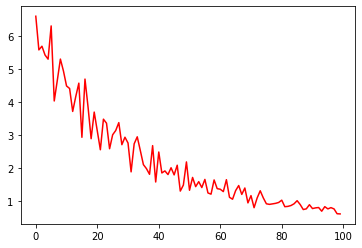

In [4]:
def mini_batch_gradient_descent():
    n_iterations = 200
    minibatch_size = 64
    
    thetas = np.random.randn(14, 1)
    thetas_path = [thetas]    
    losses = []
    
    for epoch in range(n_iterations):
        shuffled_indices = np.random.permutation(m)
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]
                
        for i in range(0, m, minibatch_size):
            xi = X_b_shuffled[i:i+minibatch_size]
            yi = y_shuffled[i:i+minibatch_size]
            
            # tính output 
            output = xi.dot(thetas)
            
            # tính loss
            loss = (output - yi)**2
            
            # tính đạo hàm cho loss
            loss_grd = 2*(output - yi)/minibatch_size
            
            # tính đạo hàm cho các tham số
            gradients = xi.T.dot(loss_grd)
            
            # cập nhật tham số
            learning_rate = 0.01
            thetas = thetas - learning_rate*gradients
            thetas_path.append(thetas)
            
            loss_mean = np.sum(loss)/minibatch_size
            losses.append(loss_mean)

    return thetas_path, losses

mbgd_thetas, losses = mini_batch_gradient_descent()

# in loss cho 100 sample đầu
x_axis = list(range(100))
plt.plot(x_axis,losses[:100], color="r")
plt.show()

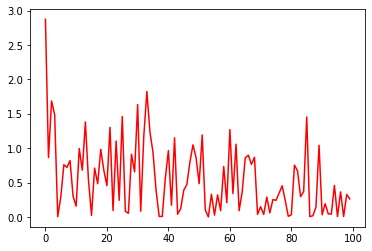

In [5]:
def stochastic_gradient_descent():
    n_epochs = 50
    learning_rate = 0.01
    
    # khởi tạo giá trị tham số
    thetas = np.random.randn(14, 1)
    
    thetas_path = [thetas]
    losses = []
    
    for epoch in range(n_epochs):
        for i in range(m):
            # lấy ngẫu nhiên 1 sample
            random_index = np.random.randint(m)
            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            
            # tính output 
            oi = xi.dot(thetas)
            
            # tính loss li
            li = (oi - yi)*(oi - yi) / 2
            
            # tính gradient cho loss
            g_li = (oi - yi)
            
            # tính gradient 
            gradients = xi.T.dot(g_li)
                        
            # update giá trị theta
            thetas = thetas - learning_rate*gradients
            
            # logging
            thetas_path.append(thetas)            
            losses.append(li[0][0])

    return thetas_path, losses

bgd_thetas, losses = stochastic_gradient_descent()

# in loss cho 100 sample đầu
x_axis = list(range(100))
plt.plot(x_axis,losses[:100], color="r")
plt.show()

#print(losses[:100])

#plt.scatter(X, y)
#data_y = X*bgd_thetas[-1][1]+ bgd_thetas[-1][0]
#plt.plot(X,data_y, color="r")
#plt.show()